### A Performance Analysis of Pizza Place Restaurants in 2015: Exploring Success Factors and Trends
#### Author: Wika Dhammayanti

### Introduction
In this analysis, we aim to explore and evaluate the performance of Pizza Place restaurants in the year 2015. By examining key metrics such as order volume, peak hours, popular pizza choices, and revenue breakdown by pizza size and type, we seek to gain a comprehensive understanding of the restaurant's performance and customer preferences during that period.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_csv('pizzas.csv')
df2= pd.read_csv('orders.csv')
df3= pd.read_csv('order_details.csv')

In [3]:
df1.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [4]:
# Number of rows
print(df1.shape)

# Column names
print(df1.columns.tolist())

# Data types
print(df1.dtypes)

(96, 4)
['pizza_id', 'pizza_type_id', 'size', 'price']
pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object


In [5]:
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
# Number of rows
print(df2.shape)

# Column names
print(df2.columns.tolist())

# Data types
print(df2.dtypes)

(21350, 3)
['order_id', 'date', 'time']
order_id     int64
date        object
time        object
dtype: object


In [7]:
df2['time'] = pd.to_datetime(df2['time'], format='%H:%M:%S').dt.time

In [8]:
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [9]:
# Data types
print(df2.dtypes)

order_id     int64
date        object
time        object
dtype: object


In [10]:
df3.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [11]:
# Number of rows
print(df3.shape)

# Column names
print(df3.columns.tolist())

# Data types
print(df3.dtypes)

(48620, 4)
['order_details_id', 'order_id', 'pizza_id', 'quantity']
order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object


### Data Description
The dataset df1 contains information about pizzas, with a shape of (96, 4). It consists of the following columns:

- pizza_id: An object (string) data type representing the unique identifier of each pizza. Each pizza in the dataset is assigned a specific ID.

- pizza_type_id: An object (string) data type representing the identifier for the type or variety of pizza. Each pizza type corresponds to a specific category or flavor.

- size: An object (string) data type indicating the size of the pizza. It represents the portion or diameter of the pizza, defining its physical dimensions.

- price: A float64 data type representing the price of the pizza. It indicates the monetary value associated with each pizza in the dataset.

The dataset df2 contains information about pizza orders, with a shape of (21,350, 3). It consists of the following columns:

- order_id: An integer data type representing the unique identifier for each pizza order. Each order in the dataset is assigned a specific ID.

- date: A datetime64[ns] data type representing the date of the pizza order. This column allows for precise handling and analysis of temporal data.

- time: A datetime64[ns] data type representing the time of the pizza order. Similar to the date column, this column provides accurate time-related information.

The dataset df3 contains information about pizza order details, with a shape of (48,620, 4). It consists of the following columns:

- order_details_id: An integer data type representing the unique identifier for each pizza order detail. Each order detail in the dataset is assigned a specific ID.

- order_id: An integer data type representing the unique identifier for each pizza order. This column establishes a relationship between the order details and the specific order it belongs to.

- pizza_id: An object (string) data type representing the identifier for each pizza type. Each pizza in the dataset is associated with a specific pizza ID.

- quantity: An integer data type indicating the quantity of pizzas ordered for each order detail.

In [12]:
# Check for duplicate rows
duplicate_rows = df1.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Check for missing values
missing_values = df1.isnull().sum()
print("Missing values:\n", missing_values)

Number of duplicate rows: 0
Missing values:
 pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64


In [13]:
# Check for duplicate rows
duplicate_rows = df2.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Check for missing values
missing_values = df2.isnull().sum()
print("Missing values:\n", missing_values)

Number of duplicate rows: 0
Missing values:
 order_id    0
date        0
time        0
dtype: int64


In [14]:
# Check for duplicate rows
duplicate_rows = df3.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Check for missing values
missing_values = df3.isnull().sum()
print("Missing values:\n", missing_values)

Number of duplicate rows: 0
Missing values:
 order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64


### Data Cleanning and Feature Engineering
Since the datasets (df1, df2, df3) do not contain any duplicate rows or missing values, it indicates that the data is already in a clean and complete state. For df2, feature engineering was conducted to convert the 'date' columns to the datetime data type, enabling more precise temporal analysis.

With the datasets cleaned and preprocessed, they are ready for further analysis. No additional cleaning actions or feature engineering steps are required at this stage. The provided datasets (df1, df2, df3) are suitable for analyzing the performance of Pizza Place restaurants in the year 2015.

### Data Merging
To create a single consolidated dataset, the cleaned datasets (df1, df2, df3) were merged using the following process:

Merging df1 and df3:

- The merging was performed based on the 'pizza_id' column, which serves as a common identifier between the two datasets. An inner join method was used to merge the datasets. This ensured that only the matching rows between df1 and df3 were included in the merged dataset. The resulting merged dataset retained the columns from both df1 and df3.

Merging the merged_data with df2:

- The merged_data from the previous step was further merged with df2 using the 'order_id' column as the key. Again, an inner join method was used to merge the datasets, ensuring that only the matching rows between merged_data and df2 were included in the final consolidated dataset. The resulting merged dataset retained the columns from df1, df2, and df3, effectively combining all the relevant information from the three datasets.

By performing these merging operations, a single consolidated dataset was created, containing information from all three datasets (df1, df2, df3). The merging process allowed for the integration of data related to pizzas, order details, and order dates and times into a unified dataset, facilitating comprehensive analysis of the Pizza Place restaurant's performance in the year 2015.

In [15]:
merged_data = pd.merge(df1, df3, on='pizza_id', how='inner')
merged_data = pd.merge(merged_data, df2, on='order_id', how='inner')
merged_data

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity,date,time
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1,2015-01-01,12:29:36
1,the_greek_s,the_greek,S,12.00,12,6,1,2015-01-01,12:29:36
2,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1,2015-01-02,17:54:04
3,prsc_argla_s,prsc_argla,S,12.50,240,102,1,2015-01-02,17:54:04
4,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1,2015-01-02,20:12:34
...,...,...,...,...,...,...,...,...,...
48615,veggie_veg_l,veggie_veg,L,20.25,45909,20157,1,2015-12-09,13:10:25
48616,veggie_veg_l,veggie_veg,L,20.25,46092,20236,1,2015-12-10,15:05:44
48617,veggie_veg_l,veggie_veg,L,20.25,47003,20658,1,2015-12-17,14:15:30
48618,veggie_veg_l,veggie_veg,L,20.25,47480,20862,1,2015-12-20,19:04:16


### Exploratory Data Analysis (EDA)
In this section, we explore and analyze the main characteristics of the dataset.

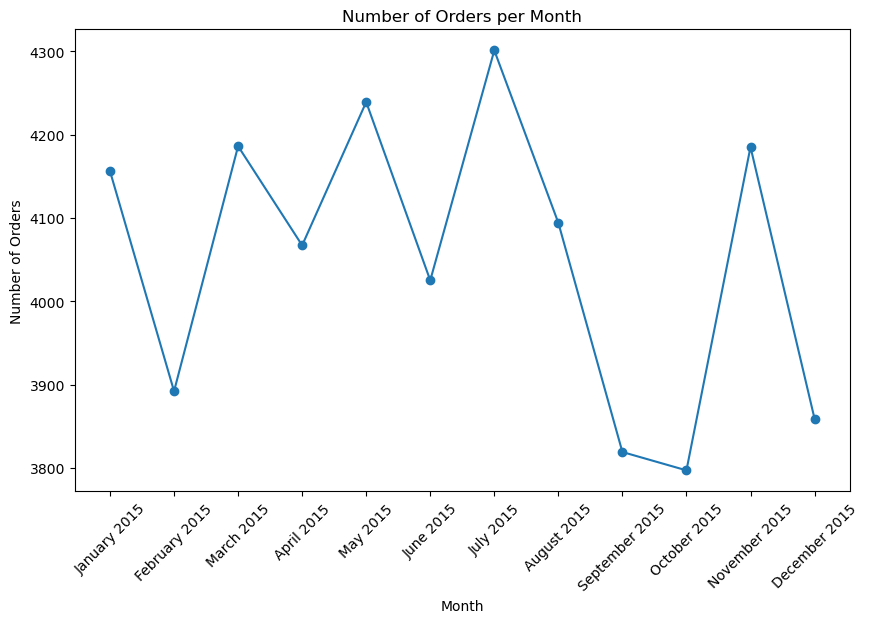

In [16]:
import calendar

# Convert the 'date' column to datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Extract the month and year from the 'date' column
merged_data['month'] = merged_data['date'].dt.month
merged_data['year'] = merged_data['date'].dt.year

# Create a new column with the month and year labels
merged_data['month_year'] = merged_data['date'].dt.strftime('%B %Y')

# Count the number of orders per month
orders_per_month = merged_data.groupby('month_year')['order_id'].count()

# Define the sort order of the month-year labels
month_order = [calendar.month_name[i] + ' 2015' for i in range(1, 13)]

# Plot the number of orders per month as a line chart
plt.figure(figsize=(10, 6))
orders_per_month.reindex(month_order).plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')
plt.xticks(range(len(month_order)), month_order, rotation=45)
plt.show()


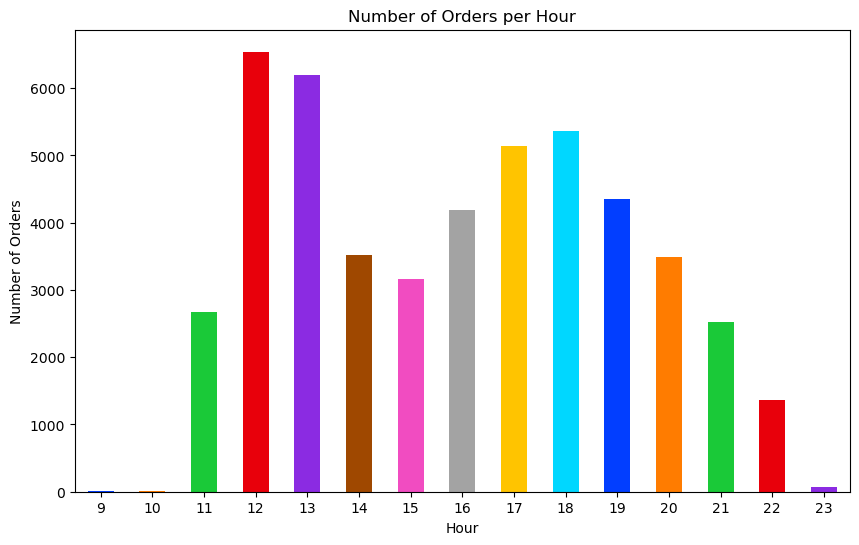

In [17]:
# Convert the 'time' column to string format
merged_data['time'] = merged_data['time'].astype(str)

# Extract the hour from the 'time' column
merged_data['hour'] = merged_data['time'].str[:2].astype(int)

# Count the number of orders per hour
orders_per_hour = merged_data.groupby('hour')['order_id'].count()

# Define a color palette
colors = sns.color_palette('bright')

# Plot the number of orders per hour as a bar chart with colorful bars
plt.figure(figsize=(10, 6))
orders_per_hour.plot(kind='bar', color=colors)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour')
plt.xticks(rotation=0)
plt.show()




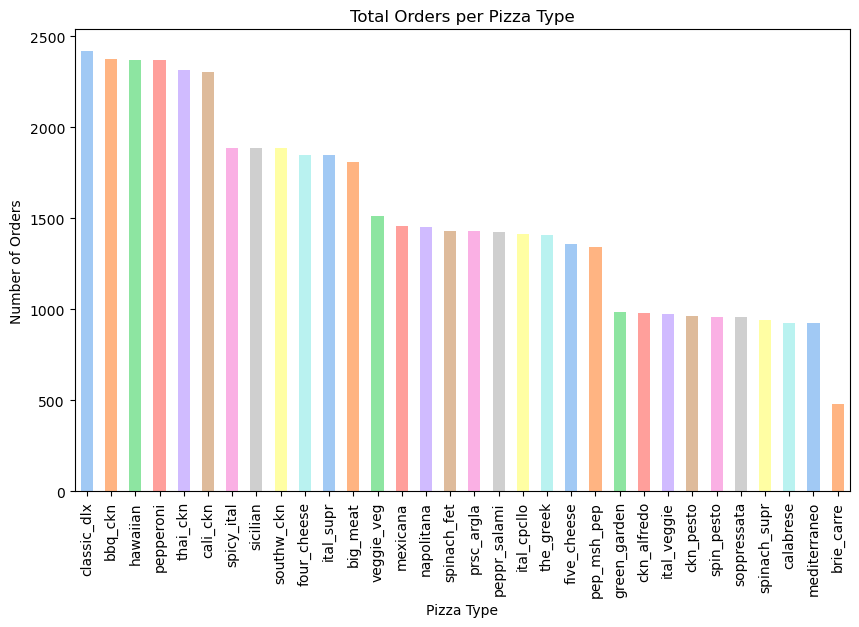

In [19]:
# Count the number of orders per pizza type
pizza_type_id_orders = merged_data['pizza_type_id'].value_counts()

# Define a color palette
colors = sns.color_palette('pastel')

# Plot the total orders for each pizza type with colorful bars
plt.figure(figsize=(10, 6))
pizza_type_id_orders.plot(kind='bar', color=colors)
plt.xlabel('Pizza Type')
plt.ylabel('Number of Orders')
plt.title('Total Orders per Pizza Type')
plt.show()


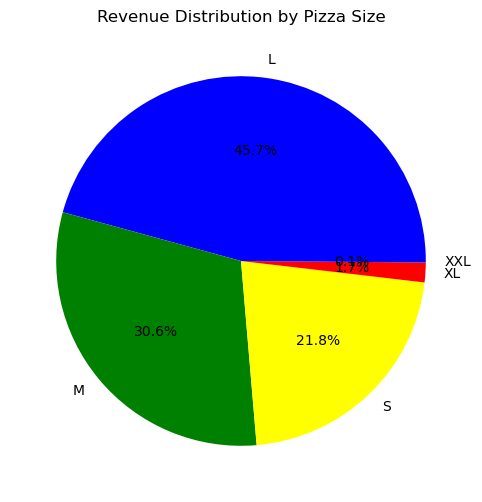

In [20]:
# Calculate the revenue for each size of pizza
pizza_revenue_size = merged_data.groupby('size')['price'].sum()

# Calculate the total revenue
total_revenue = pizza_revenue_size.sum()

# Calculate the revenue percentage for each size of pizza
pizza_revenue_percentage = (pizza_revenue_size / total_revenue) * 100

# Plot the revenue for each size of pizza as a pie chart
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'yellow', 'red']
plt.pie(pizza_revenue_size, labels=pizza_revenue_size.index, autopct='%1.1f%%', colors=colors)
plt.title('Revenue Distribution by Pizza Size')
plt.show()

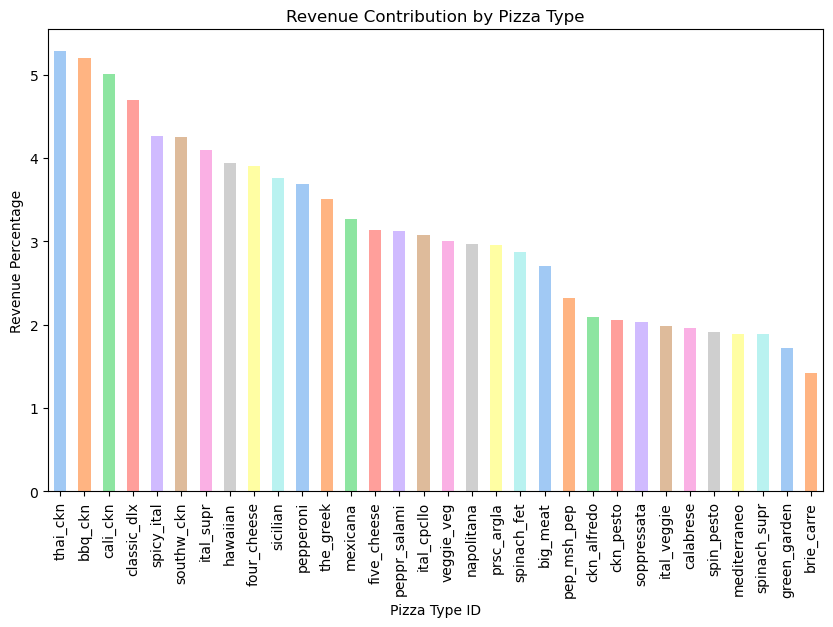

In [21]:
# Define a color palette
colors = sns.color_palette('pastel')

# Calculate the revenue for each pizza type
pizza_revenue_type = merged_data.groupby('pizza_type_id')['price'].sum()

# Calculate the total revenue
total_revenue = pizza_revenue_type.sum()

# Calculate the revenue percentage for each pizza type
pizza_revenue_percentage = (pizza_revenue_type / total_revenue) * 100

# Sort the revenue values in descending order
sorted_revenue_percentage = pizza_revenue_percentage.sort_values(ascending=False)

# Plot the revenue percentage for each pizza type
plt.figure(figsize=(10, 6))
sorted_revenue_percentage.plot(kind='bar', color=colors)
plt.xlabel('Pizza Type ID')
plt.ylabel('Revenue Percentage')
plt.title('Revenue Contribution by Pizza Type')
plt.show()


### Insight
Based on the visualization, the following insights can be derived:

- The highest number of Pizza orders was observed in July 2015, followed by a decline from August to October 2015. However, there was an increase in November 2015.
- The peak hours for Pizza orders are at 12 and 13 o'clock, indicating the lunchtime rush.
- Large-sized pizzas contribute the most to the overall revenue distribution.
- The pizza types "thai_ckn" and "bbq_chkn" show the highest revenue distribution.

### Conclusion
The analysis of the pizza order dataset reveals interesting patterns. The highest demand for pizzas was observed in July 2015, indicating a potential seasonal trend. Additionally, the peak hours at 12 and 13 o'clock suggest that the lunchtime period is crucial for attracting customers. Large-sized pizzas contribute significantly to the revenue, indicating a preference for larger portions among customers. Moreover, the popularity of "thai_ckn" and "bbq_chkn" pizza types implies that these flavors are well-received by customers.

### Recomendation
Based on the insights gained, the following recommendations can be made:

1. Capitalize on the seasonal demand: During peak periods, such as July, additional marketing efforts and promotions can be implemented to further boost sales and customer engagement.
2. Enhance lunchtime offerings: To attract more customers during lunch hours, consider introducing lunch specials, combos, or express services to cater to time-constrained individuals seeking a quick and satisfying meal.